In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data_sem_pca.csv')
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,...,keyword_wyoming,keyword_xmen,keyword_yacht,keyword_yakuza,keyword_yardsale,keyword_year2054,keyword_zeus,keyword_zombie,keyword_zombieapocalypse,keyword_zoo
0,0.889163,0.529412,0.508175,0.037090,0.001559,1.000000,0.524453,0.007358,0.603479,0.019402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.370690,0.501548,0.024393,0.043395,0.062497,0.406840,0.278865,0.073620,0.244515,0.024559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.740148,0.436533,0.391504,0.006914,0.017184,0.263080,0.163256,0.017813,0.196284,0.020056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.486068,0.956518,1.000000,0.042185,0.589253,0.677216,0.162559,0.533702,0.020466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.567734,0.386997,0.020567,0.022959,0.000997,0.096066,0.125579,0.002849,0.145681,0.021587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Variáveis experimentais
ks = [i for i in range(1,21)]
knnresults = {}
treeresults={}
svmresults={}
k_history = {}

## 1. Número de curtidas na página do filme do facebook

In [4]:
title = 'Número de curtidas na página do filme do facebook'
variable = 'movie_facebook_likes'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [5]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

In [6]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

(Text(0.5,1,'Número de curtidas na página do filme do facebook\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     10.934113
 2     10.180605
 3      9.979933
 4      9.837506
 5      9.795616
 6      9.754336
 7      9.767933
 8      9.732918
 9      9.714870
 10     9.679708
 11     9.683738
 12     9.672831
 13     9.670457
 14     9.657083
 15     9.651902
 16     9.647598
 17     9.646355
 18     9.639530
 19     9.633171
 20     9.621647
 dtype: float64)

In [7]:
# adotando k=9
k=9
knnresults[variable] = kresults[k-1]
knnresults[variable]

9.714869675193773

### Árvore de Decisão

In [8]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

8.48687137709759

### SVM

In [9]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

9.850854493996275

## 2. Número de avaliações por usuário

In [10]:
title = 'Número de avaliações por usuário'
variable = 'num_user_for_reviews'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [11]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Número de avaliações por usuário\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     5.363105
 2     4.867591
 3     4.602742
 4     4.444937
 5     4.378909
 6     4.326651
 7     4.271098
 8     4.232027
 9     4.208709
 10    4.180087
 11    4.160505
 12    4.155620
 13    4.143703
 14    4.128525
 15    4.135052
 16    4.123993
 17    4.117305
 18    4.117193
 19    4.116937
 20    4.110403
 dtype: float64)

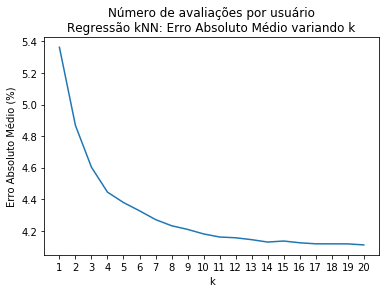

In [12]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [13]:
# Adotando k = 11
k=11
knnresults[variable] = kresults[k-1]
knnresults[variable]

4.160505297592032

### Árvore de Decisão

In [14]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

2.2445894179956136

### SVM

In [15]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

7.459285830461186

## 3. Número de revisões críticas

In [16]:
title = 'Número de Revisões Críticas'
variable = 'num_critic_for_reviews'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [17]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Número de Revisões Críticas\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     11.757095
 2     10.443015
 3      9.873219
 4      9.595530
 5      9.438339
 6      9.323511
 7      9.315824
 8      9.247904
 9      9.192631
 10     9.145216
 11     9.094443
 12     9.076035
 13     9.065816
 14     9.054047
 15     9.024906
 16     8.991195
 17     8.993686
 18     8.985128
 19     8.992131
 20     8.980474
 dtype: float64)

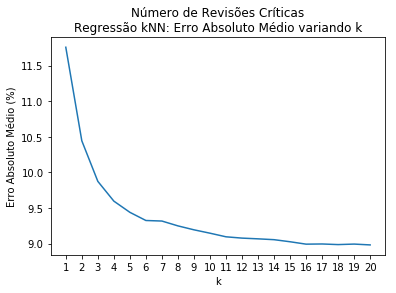

In [18]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [19]:
# Adotando k = 11
k=11
knnresults[variable] = kresults[k-1]
knnresults[variable]

9.094442703852092

### Árvore de Decisão

In [20]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

4.805177240540294

### SVM

In [21]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

8.838732089996945

## 4. Número de Votos

In [22]:
title = 'Número de Votos'
variable = 'num_voted_users'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [23]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Número de Votos\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     5.381131
 2     5.042503
 3     4.844481
 4     4.760922
 5     4.700066
 6     4.667999
 7     4.656112
 8     4.646207
 9     4.623817
 10    4.605299
 11    4.594184
 12    4.586467
 13    4.578689
 14    4.577182
 15    4.574478
 16    4.555770
 17    4.563857
 18    4.566356
 19    4.560719
 20    4.561668
 dtype: float64)

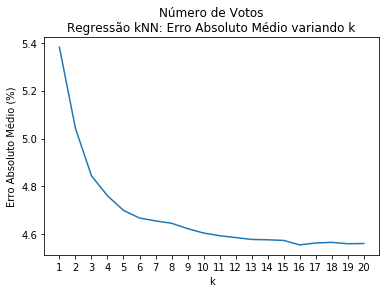

In [24]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [25]:
# Adotando k = 10
k = 10
knnresults[variable] = kresults[k-1]
knnresults[variable]

4.605298934357853

### Árvore de Decisão

In [26]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

2.2581805141345344

### SVM

In [27]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

8.0688670463598

## 5. Arrecadação

In [28]:
title = 'Arrecadação'
variable = 'gross'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [29]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Arrecadação\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     6.354459
 2     5.846782
 3     5.592243
 4     5.489585
 5     5.428903
 6     5.351740
 7     5.312681
 8     5.302507
 9     5.270785
 10    5.243635
 11    5.226064
 12    5.222880
 13    5.221602
 14    5.210874
 15    5.196347
 16    5.183613
 17    5.188107
 18    5.175021
 19    5.162784
 20    5.163752
 dtype: float64)

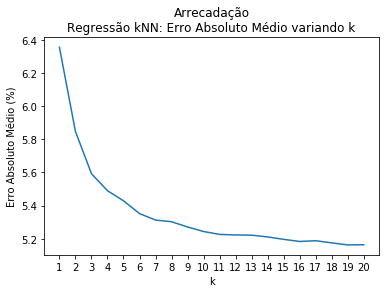

In [30]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [31]:
# Adotando k = 10
k=10
knnresults[variable] = kresults[k-1]
knnresults[variable]

5.243635099884843

### Árvore de Decisão

In [32]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

4.084404499909435

### SVM

In [33]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

7.688380033169394

## 6. Escore IMDb

In [34]:
title = 'Escore IMDb'
variable = 'imdb_score'
X = df.drop(variable, axis='columns')
y = df[variable]

### kNN

In [35]:
kresults = []
for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, p=2, algorithm='kd_tree')
    result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
    kresults.append(abs(result.mean() * 100))
k_history[variable] = kresults

(Text(0.5,1,'Escore IMDb\nRegressão kNN: Erro Absoluto Médio variando k'),
 1     14.452994
 2     12.755735
 3     11.981917
 4     11.609881
 5     11.342641
 6     11.180536
 7     11.078621
 8     10.990306
 9     10.916909
 10    10.888486
 11    10.810716
 12    10.775763
 13    10.776774
 14    10.735622
 15    10.701264
 16    10.683175
 17    10.672873
 18    10.648100
 19    10.645311
 20    10.633310
 dtype: float64)

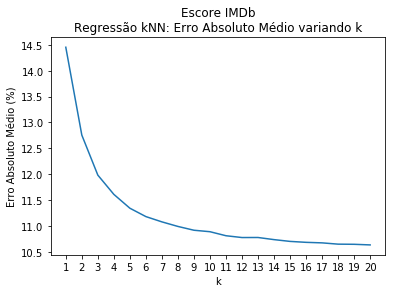

In [36]:
kseries = pd.Series(data=kresults, index=ks)
plot = kseries.plot(x=ks)
plot.set_xticks(ks)
plot.set_xlabel('k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_title(title+'\nRegressão kNN: Erro Absoluto Médio variando k'), kseries

In [37]:
# Adotando k = 8
k = 8
knnresults[variable] = kresults[k-1]
knnresults[variable]

10.990305975727729

### Árvore de Decisão

In [38]:
# Todas as configurações são default
regressor = DecisionTreeRegressor(random_state=0)
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
treeresults[variable] = abs(result.mean() * 100)
treeresults[variable]

9.23110891877426

### SVM

In [39]:
regressor = SVR()
result = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=10)
svmresults[variable] = abs(result.mean() * 100)
svmresults[variable]

9.672749824180652

# Visão Geral

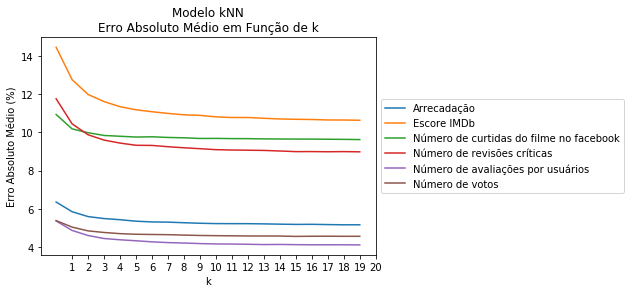

In [40]:
khistory_df = pd.DataFrame(k_history)
plot = khistory_df.plot(kind='line')
plot.set_xticks(ks)
plot.set_title('Modelo kNN\nErro Absoluto Médio em Função de k')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_xlabel('k')
patches, labels = plot.get_legend_handles_labels()
labels = ['Arrecadação', 'Escore IMDb', 'Número de curtidas do filme no facebook', 'Número de revisões críticas', 'Número de avaliações por usuários', 'Número de votos']
plot.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0.5))


[Text(0,0,'Arrecadação'),
 Text(0,0,'Escore IMDb'),
 Text(0,0,'Número de curtidas do filme no facebook'),
 Text(0,0,'Número de revisões críticas'),
 Text(0,0,'Número de avaliações por usuários'),
 Text(0,0,'Número de votos')]

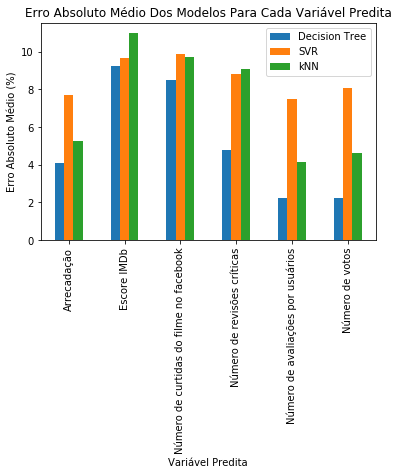

In [41]:
full_results = {
    'kNN': knnresults,
    'Decision Tree': treeresults,
    'SVR': svmresults
}
full_results = pd.DataFrame(full_results)
plot = full_results.plot(kind='bar')
plot.set_title('Erro Absoluto Médio Dos Modelos Para Cada Variável Predita')
plot.set_ylabel('Erro Absoluto Médio (%)')
plot.set_xlabel('Variável Predita')
plot.set_xticklabels(['Arrecadação', 'Escore IMDb', 'Número de curtidas do filme no facebook', 
                      'Número de revisões críticas', 'Número de avaliações por usuários', 'Número de votos'])